# [LINMA1702] Localisation optimale des capacités de production élionnes en Europe 
##### <center> *Ansotte Justin | Belpaire Victor | Charles Benjamin*

# **A. Introduction**

Ce projet a pour objectif d'étudier un nouveau modèle européen de la production d'électricité se reposant exclusivement (et de la manière la plus optimale) sur l'énergie éolienne. Les sites éoliens étudiés seront soit *onshore* soit *offshore*.

# **Partie 1. Analyse d'un modèle européen intégré**

## *1.1 Formulation du problème sous la forme d'un modèle d'optimisation linéaire*

**Variables :** 
- $x_{i}$ = puissance attribuée au site i.
- $t_{j}$ = variables introduites pour formuler la contrainte de variabilité de manière linéaire.


**Constantes :**
- $P$ = puissance totale installée
- $\kappa$ = fraction de la puissance installée offshore
- $\delta$ = fraction de la puissance installée qui sert de borne supérieure pour la variabilité


**contraintes :**
- $\sum_{i=1}^{642} x_i = P$

La première contrainte signifie que la puissance totale installée soit égale au paramètre $P$ donné.

- $0 \leq x_i \leq c_{i}$  pour tout $i \in \{1,\dots,642\}$.

La deuxième impose que la puissance attribuée au site $i$ soit comprise entre 0 et la capacité maximale du site $i$.
<br>
$c_i$ est donc la i-ème composante du vecteur $c$ qui contient les capacités maximales des différents sites.

- $\sum_{i=1}^{642} a_i x_i = \kappa P$

La troisième impose qu'une proportion $\kappa$ de la puissance totale $P$ soit attribuée à des sites offshores. La i-ème composante du vecteur $a$ est définie comme étant égale à 1 si le site $i$ est un site offshore ou égale à 0 sinon.

- $ -t \leq MRx \leq t$
- $\sum_{i=1}^{8760/T - 1} t_i \leq T \delta P (8760/T - 1)$

<br>
La quatrième et dernière contrainte impose que la variabilité moyenne définie comme étant la valeur moyenne des différences (prises en valeur absolue) de production totale effective entre deux périodes (de $T$ heures) consécutives, soit maintenue sous une certaine valeur maximale.
<br>
La matrice $R$ est une matrice de taille $8760$ par $642$ et définie telle que la composante $r_{ji}$ soit égale au rendement du site $i$ durant l'heure $j$. De cette manière si on multiplie $R$ par $x$ on obtient un vecteur $e$ de taille 8760. La i-ème composante de $e$ représente la production totale d'énergie durant l'heure $j$. 

\begin{equation*}
Rx = \begin{pmatrix}
r_{1,1} & r_{1,1} & \cdots & r_{1,642} \\
r_{2,1} & r_{2,2} & \cdots & r_{2,642} \\
\vdots  & \vdots  & \ddots & \vdots  \\
r_{8760,1} & r_{8760,2} & \cdots & r_{8760,642} 
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots\\
x_{642}
\end{pmatrix}
=\begin{pmatrix}
e_{1}\\
e_{2}\\
\vdots\\
e_{8760}
\end{pmatrix}
\end{equation*}

La matrice $M$ nous permet de combiner ces énergies. La taille de la matrice $M$ est de $8760/T-1$ par $8760$. Le nombre de lignes dépend de la période $T$ utilisée dans la définition de la variabilité.
Prenons comme exemple le cas ou $T = 3$, on obtient:

\begin{equation*}
Me = \begin{pmatrix}
1 & 1 & 1 & -1 & -1 & -1 & 0  &  0 &  0  & \cdots & 0 &0 & 0\\
0 & 0 & 0 &  1 & 1  & 1  & -1 & -1 & -1  & \cdots & 0 &0 & 0\\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  &\vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots & -1 & -1 & -1\\
\end{pmatrix}
\begin{pmatrix}
e_{1}\\
e_{2}\\
\vdots\\
e_{8760}
\end{pmatrix}
=\begin{pmatrix}
e_{1} + e_{2} + e_{3} - e_{4} - e_{5} - e_{6} \\
e_{4} + e_{5} + e_{6} - e_{7} - e_{8} - e_{9} \\
\vdots \\
e_{8755} + e_{8756} + e_{8757} - e_{8758} - e_{8759} - e_{8760}
\end{pmatrix}
\end{equation*}

La i-ème ligne de la matrice $M$ contient donc $T$ fois le nombre 1 à la position $(i - 1)T + 1$ jusqu'à la position 
$(i - 1)T + T$  et $T$ fois le nombre -1 au $T$ indices suivants. Les autres éléments de la ligne valent 0.
La définition donnée pour la contrainte de variabilité nous disait que la moyenne de la somme des valeurs absolues des composantes du vecteur $Me = E$ devait être bornée par $\delta TP$.
<br>

$\frac{1}{8760/T - 1}(|E_{1}| + |E_{2}| + \cdots + |E_{8760/T - 1}|) \leq \delta TP $

<br>
Où $E_i$ correspond à la i-ème composante du vecteur $E$.
Pour transformer cette contrainte en une contrainte linéaire nous avons introduit les variables $t_j$. A chaque valeur absolue dans notre somme correspond une variable $t_j$. En posant que $|E_{j}| \leq t_{j}$ ce qui revient à dire que 
$-t_j \leq E_{j} \leq t_j$ on transforme ainsi notre contrainte non linéaire en contrainte linéaire sans pour autant avoir modifié le problème car à l'optimum la contrainte sera serrée et donc $|E_{j}|$ sera égal à $t_{j}.$



**Fonction objectif :**

- maximum $ \sum_{i=1}^{642}\sum_{j=1}^{8760} x_i r_{ji}$

où $r_{ji}$ représente le rendement du site $i$ durant l'heure $j$.
On cherche donc à maximiser l'énergie totale produite par les éoliennes au cours d'une année.

**Notes :**

Dans tout ce qui a été décrit précedemment, 8760 représente le nombre d'heures considérées.On peut sans aucun problème remplacer 8760 par un autre nombre entier plus petit. On obtient alors un problème qui ne prend en compte que les $N$ premières heures, ce qui nous donne un problème moins contraint et donc plus facile à résoudre.
<br>
Les divisions du types 8760/T sont des divisions entières.




###  *Estimation de la taille du problème*

Seul le nombre de sites que l'on prend dans notre modèle a une influence sur le nombre de variable $x_{i}$. Le nombre de variables $t_{j}$ dépend quant à lui du nombre d'heures considérées. Si $N$ est le nombre d'heures considérées, le nombre de variables $t_j$ est égal à $N/T-1$.  
En résumé si $X$ est le nombre de sites, $N$ le nombre d'heures considérées et $T$ le pas de temps, on a $X + N/T - 1$ variables.

Une analyse similaire nous montre que le nombre de contraintes est égal à $1 + X + 2\frac{N}{T}$



## *1.2 Résolution du problème et commentaires*

In [1]:
import numpy as np
from cylp.cy import CyClpSimplex
from cylp.py.modeling.CyLPModel import CyLPModel, CyLPArray
import pandas as pd
import time
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
# quelques fonctions

def matrix_sum_periods(N, T): # somme les productions d'énergie en périodes de T heures
    M = np.zeros((N//T, N))
    for i in range(N//T):
        M[i, i*T:(i+1)*T] = ([1] * T)
    
    return np.matrix(M)

def var_matrix(n): # cette matrice calcule la différence de production d'énergie entre deux périodes consécutives
    M = np.zeros((n-1, n))
    for i in range(n-1):
        M[i,i] = 1
        M[i,i+1] = -1
    return np.matrix(M)

def matrix_rendement(rend_off, rend_on, sites): # sélectionne les bonnes lignes des matrices de rendement
    lignes = len(rend_off)
    colonnes = len(rend_off[0])
    
    M = np.empty((lignes, colonnes))
    for i, site in sites.iterrows():
        if site['capacite offshore'] == 'Oui':
            M[i] = rend_off[i]
        else:
            M[i] = rend_on[i]
    
    return np.matrix(M)

def sum_rendement(rend, nb_site): # somme les rendements de chaque site sur toutes les heures / fonction objectif
    sum_rend = np.sum(rend, axis=1)
    c = np.ndarray((nb_site,))
    for i in range(nb_site):
        c[i] = sum_rend[i,0]
    c = CyLPArray(c)
    return c

def dix_meilleurs_sites(a):
    array = list(a)
    b = max(array)
    l = []
    for i in range(10):
        a = array.index(min(array))
        l.append(a)
        array[a] = b
    return l

In [3]:
# chargement des données

nb_site = 642


sites = pd.read_csv('data/Sites.csv')
sites = sites.sort_values('index site')
sites = sites.reset_index()
capacites = sites['capacites'].copy()
capacites = CyLPArray(capacites) # shape: (642,)


off_cap = sites['capacite offshore']
off_cap = off_cap.replace('Oui', 1)
off_cap = off_cap.replace('Non', 0)
off_cap = CyLPArray(off_cap)


rend_off_entire = np.genfromtxt('data/Rendements_offshore.csv', delimiter=',')
rend_on_entire = np.genfromtxt('data/Rendements_onshore.csv', delimiter=',')

### 1.2.1 Résolution

In [4]:
# fonction de résolution

def resolution(N, T, P, d, k, verbose=True):

    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]
    I = np.matrix(np.eye(nb_site)) # shape: (642, 642)
    

    rend = matrix_rendement(rend_off, rend_on, sites) # shape: (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # shape: (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', N//T - 1)


    sum_t = CyLPArray(np.ones((N//T - 1,), dtype = int))
    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x == P, 'puissance totale')
    model.addConstraint(0 <= I*x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t <= 0, 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x + t >= 0, 'variabilitee pg') 
    model.addConstraint(sum_t * t <= (d*P*T*(N//T - 1)), 'somme variabilitee')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [5]:
N = 8760
T = 3
P = 500000
d = 0.02
k = 0.17


s, time_taken, rend = resolution(N, T, P, d, k)


sol = s.primalVariableSolution['x']
sol_t = s.primalVariableSolution['t']

résolution: optimal


### 1.2.2 Commentaires sur la résolution

In [32]:
sol_sum_t = 0
for e in sol_t:
    sol_sum_t += e   


print("N = {}\nP = {}\nT = {}\nd = {}\nk = {}\n".format(N, P, T, d, k))

print("Variabilitée moyenne: {:.2f} MWh ({})".format(sol_sum_t/(N//T - 1), "OK" if abs(sol_sum_t/(N//T - 1) - d*P*T) <= 1e-3 else "NOT OK"))

print("Puissance installée totale: {:.0f} MW ({})".format(np.sum(sol), "OK" if abs(np.sum(sol) - P) < 1e-3 else "NOT OK"))

print("Puissance installée offshore: {:.0f} MW ({})".format(np.dot(np.array(off_cap), sol), "OK" if abs(np.dot(np.array(off_cap), sol) - k*P) < 1e-3 else "NOT OK"))

print("Production d'energie totale: {:.2f} GWh".format(-s.objectiveValue/1000))

print("Rendement moyen: {:.2f}%".format(-s.objectiveValue/(P*N)*100))

print("Temps de résolution: {:.0f} min {:.3f} sec".format(time_taken//60, time_taken % 60))

N = 8760
P = 500000
T = 3
d = 0.02
k = 0.17

Variabilitée moyenne: 30000.00 MWh (OK)
Puissance installée totale: 500000 MW (OK)
Puissance installée offshore: 85000 MW (OK)
Production d'energie totale: 1959630.17 GWh
Rendement moyen: 44.74%
Temps de résolution: 13 min 10.898 sec


Le solveur trouve une solution admissible optimale avec comme valeur objectif 1960 TWh et un rendement de 44,7%, ça représente à peu près 5 fois la production annuelle d'électicité venant du nucléaire en France ou presque 60% de la production nette d'électricité en europe. Actuellement 180000 MW de puissance éolienne est installée en Europe.

### 1.2.3 Affichage des résultats sur la carte

In [41]:
sol_map = np.array([e if e > 0 else 0 for e in sol])


text_fig = ["puissance: {:.1f} MW, {:.1f}% de la capacitée installable (index={})".format(
    sol_map[i], sol_map[i]/sites['capacites'][i]*100, sites['index site'][i]) for i in range(len(sol_map))]

fig_sol = go.Figure(data=go.Scattergeo(
        lon = sites['longitude'],
        lat = sites['latitude'],
        text = text_fig,
        mode = 'markers',
        marker = dict(size = sol_map/sol_map.max()*30)
    ))

fig_sol.update_layout(
        title = 'Puissance installée sur chaque site',
        geo_scope = 'europe'
    )

fig_sol.show()

### 1.2.4 Graphe production d'énergie en fonction du temps

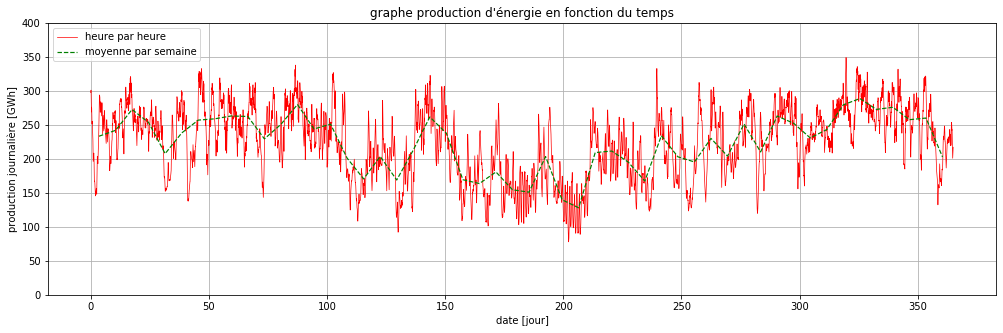

In [42]:
energie = np.array(rend.T).dot(sol)/1000
x_graph = np.arange(1,N+1,1)/24

avrg_week_x = np.arange(24*7,24*7*53,24*7)/24 - 3.5
avrg_week = np.array(matrix_sum_periods(24*7*52, 24*7)).dot(energie[:24*7*52])/(24*7)

plt.figure(figsize=(17,5))
plt.plot(x_graph, energie, '-r', linewidth=0.7)
plt.plot(avrg_week_x, avrg_week, '--g', linewidth=1.2)
plt.xlabel('date [jour]')
plt.ylabel('production journalière [GWh]')
plt.title('graphe production d\'énergie en fonction du temps')
plt.grid()
plt.legend(['heure par heure','moyenne par semaine'])
plt.ylim(0,400)
plt.show()

### 1.2.5 Graphe du temps d'éxecution en fonction de la quantité de donnée

Pour évaluer la compléxité temporelle du solveur nous avons mesuré le temps pris par la fonction dual() en faisant changer la taille de l'entrée, c'est-à-dire le nombre d'heures prises en compte. Nous l'avons évalué 12 fois entre 0 et 2000 heures avec $T = 3$ et 3 fois entre 0 et 500 heures avec $T = 1$.

In [18]:
N = 2000
P = 500000
d = 0.02
k = 0.17

temps_execT3 = []
temps_execT1 = []
N_vector = np.array([(i+1)*N//12 for i in range(12)])
    

for N_ in N_vector:    
    temps_execT3.append(resolution(N_, 3, P, d, k, verbose=False)[1])

for N_ in N_vector[:3]:    
    temps_execT1.append(resolution(N_, 1, P, d, k, verbose=False)[1])

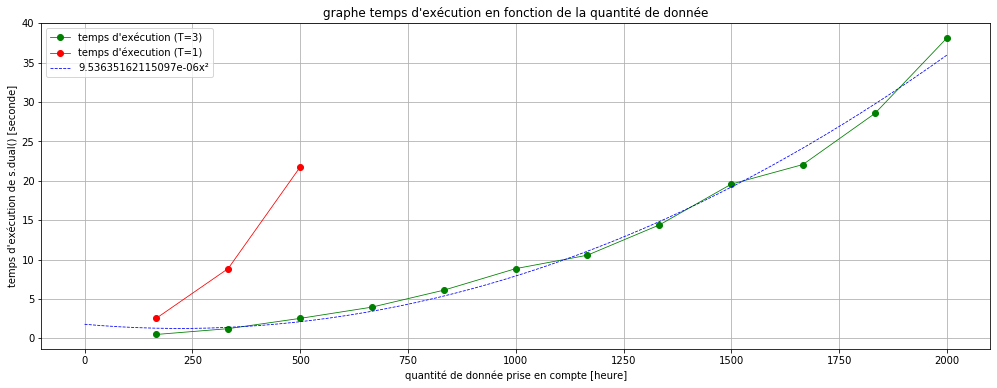

In [40]:
# plots

x_comp = np.linspace(0, 2000, 50)
poly_regrT3 = np.poly1d(np.polyfit(N_vector, temps_execT3, 2))
y_comp = poly_regrT3(x_comp)


plt.figure(figsize=(17,6))
plt.plot(N_vector, temps_execT3, '-og', linewidth=0.8)
plt.plot(N_vector[:3], temps_execT1, '-or', linewidth=0.8)
plt.plot(x_comp, y_comp, '--b', linewidth=0.8)
plt.xlabel('quantité de donnée prise en compte [heure]')
plt.ylabel('temps d\'exécution de s.dual() [seconde]')
plt.title('graphe temps d\'exécution en fonction de la quantité de donnée')
plt.grid()
plt.legend(['temps d\'exécution (T=3)', 'temps d\'éxecution (T=1)', '{}x²'.format(a)])
plt.show()

On voit clairement sur le graphe que la compléxité de l'algorithme de résolution est de $\mathcal{O}(n²)$. On voit aussi la différence de temps qu'il y a entre le paramètre $T=3$ en vert et $T=1$ en rouge. En interpolant la courbe rouge, on peut en déduire que le temps d'exécution pour $N = 8760$ serait de apprixmativement 2 heures.

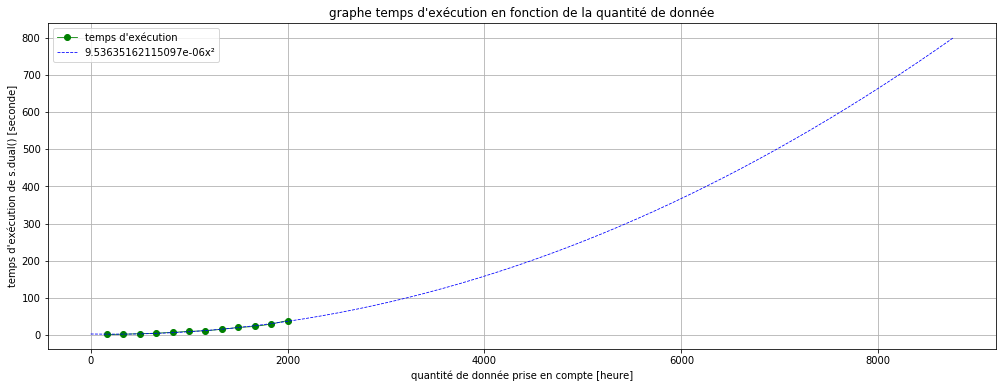

temps d'exécution prévu pour T=3 et N=8760: 13.35 minutes
temps d'exécution prévu pour T=1 et N=8760: 73.69 minutes


C:\Users\vbelp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning:

Polyfit may be poorly conditioned



In [43]:
# plots 2

x_comp = np.linspace(0, 8760, 50)
y_comp = poly_regrT3(x_comp)


plt.figure(figsize=(17,6))
plt.plot(N_vector, temps_execT3, '-og', linewidth=0.8)
plt.plot(x_comp, y_comp, '--b', linewidth=0.8)
plt.xlabel('quantité de donnée prise en compte [heure]')
plt.ylabel('temps d\'exécution de s.dual() [seconde]')
plt.title('graphe temps d\'exécution en fonction de la quantité de donnée')
plt.grid()
plt.legend(['temps d\'exécution', '{}x²'.format(a)])
plt.show()

print('temps d\'exécution prévu pour T=3 et N=8760: {:.2f} minutes'.format(y_comp[-1]/60))
poly_regrT1 = np.poly1d(np.polyfit(N_vector[:2], temps_execT1[:2], 2))
timeT1 = poly_regrT1([8760])
print("temps d\'exécution prévu pour T=1 et N=8760: {:.2f} minutes".format(timeT1[0]/60))

On peut donc prédire les temps d'exécution en appliquant la regression quadratique à nos données de temps. On voit bien que la prédiction est assez proche du temps réel mesuré pour $T=3$. On remarque aussi que le temps d'exécution pour $T=1$ serait de plus de une heure mais cette donnée n'est pas très précise car elle a été calculée par regression quadritique de seulement 3 points mais ça nous donne tout de même une idée de l'ordre de grandeur du temps d'exécution.

## *1.3 Paramètres à changer*

### 1.3.1 Formule donnant l'évolution de l'énergie totale lorsque la puissance passe de P à P + $\Delta P$

Pour trouver l'évolution de l'énergie totale lorsqu'on change la contrainte de puissance, il faut s'intéresser au problème dual. Par la dualité forte nous savons que l'objectif du dual est égal à l'objectif du primal c'est-à-dire $c^{T}x^{*}$ = $b^{T}y^{*}$. Où x* et y* sont des solutions optimales du problème primal et dual respectivement.
Le problème consiste donc à trouver la variation de l'objectif lorsqu'une des contraintes du primal change, c'est a dire si le vecteur b devient b + $\Delta b$. Où $\Delta b_i$ est non nul uniquement pour la contrainte qui varie (ici c'est la contrainte 1).
On voit directement que la variation de l'objectif est donné par $\Delta b_1 y_1^*$. Où $y_1^*$ est la variable duale associée à la contrainte qui varie , c'est-à-dire la contrainte du primal imposant la puissance. Dans nore cas on a que $\Delta b_1$ = $\Delta P$.
<br>
En conclusion l'objectif change de $y_{1}^*\Delta P$,
ce qui implique une variation d'énergie totale produite de -$y_1^*\Delta P$ (voir note)

**Note :** 
Notre problème est un problème de maximisation que l'on peut écrire comme max f(x) ou comme -min -f(x), il ne faut donc pas oublier le moins devant min -f(x) qui change le signe de la solution.



In [10]:
y_1 = s.dualConstraintSolution['puissance totale']
print(y_1)

[286.0755147]


### 1.3.2 Dix sites les plus rentables ###


Pour trouver les dix sites pour lesquels une augmentation de puissance serait la plus rentable en termes d'énergie produite, il faut de nouveau regarder les variables du problème dual. Dans ce cas-ci, les variables qui nous intéressent sont celles associées à ces contraintes :
- $0 \leq x_i \leq c_{i}$  pour tout $i \in \{1,\dots,642\}$.

On doit choisir les dix variables duales associées à ces différentes contraintes qui sont les plus négatives
car, commme expliqué au-dessus, une modification des contraintes du primal engendrera une modification de la valeur de l'objectif du dual et donc aussi à l'optimum, de la valeur de la fonction objectif du primal. Il faut donc choisir les variables les plus négatives pour que la fonction objectif du primal diminue le plus possible sans oublier que le problème s'écrit $\displaystyle-\min_{x} -f(x)$ et que donc une diminution de $-f(x)$ engendre une augmentation de $-(-f(x))$.
<br>
En conclusion, la production d'énergie augmentera de $\sum_{i=1}^{10} -y_i \Delta b_i$ 
<br>
Où $y_i$ sont les variables duales les plus négatives et $\Delta b_i$ les variations des capacités maximales des 10 sites.



In [33]:
sol_dual_capa = s.dualConstraintSolution['capacitee']
dix_m_sites = dix_meilleurs_sites(sol_dual_capa)
dix_m_sites_df = sites.loc[sites['index site'].isin(dix_m_sites)]
augmentation = []
for index in dix_m_sites_df['index site']:
    augmentation.append(sol_dual_capa[index])

dix_m_sites_df.insert(9, 'augmentation', -np.array(augmentation), True)
print(dix_m_sites_df[['index site', 'pays', 'capacite offshore', 'capacites','augmentation']])

     index site         pays capacite offshore    capacites  augmentation
69           69     Danemark               Non  2981.220961   2218.916018
237         237      Irlande               Non   278.256449   2410.356924
241         241      Irlande               Non   195.534388   2279.224592
315         315      Norvège               Non   331.424858   2244.249651
429         429     Portugal               Non  1072.521495   2254.163142
437         437     Portugal               Non  1697.185732   2342.296586
439         439  Royaume-Uni               Non   429.509536   2257.762465
442         442  Royaume-Uni               Non   783.762796   2269.029456
612         612        Suède               Non   802.013655   2339.784942
623         623        Suède               Non  1226.549065   2201.661630


Le vecteur dix_m_sites contient les index des dix meilleurs sites par ordre décroissant, c'est à dire que le premier élément de dix_m_sites est l'index du site pour lequel une augmentation de capacité serait la plus rentable.
Les dix sites sont repris dans le tableau ci-dessus (ils ne sont pas dans l'ordre).
<br>
On peut facilement voir que les dix sites trouvés ne sont pas nécessairement les dix sites qui bénéficient du meilleur rendement moyen sur l'année. Cependant, pour le cas $N = 8760$ et $T = 3$, nos dix sites donnés dans le tableau ci-dessus se trouvent parmi les 40 sites bénéficiant du meilleur rendement moyen. On en conclut donc qu'il y a quand même un lien entre rendement moyen et site rentable.

Sur le graphe ci-dessous on peut voir comment varie le rendement moyen en fonction de l'augmentation de capacité des dix meilleurs sites, pour une augmentation allant de 0 à 300 MW pour chaque site parmi les 10 trouvés au-dessus.
On peut voir que le rendement moyen augmente relativement bien pour une augmentation assez faible de la capacité de ces 10 sites.

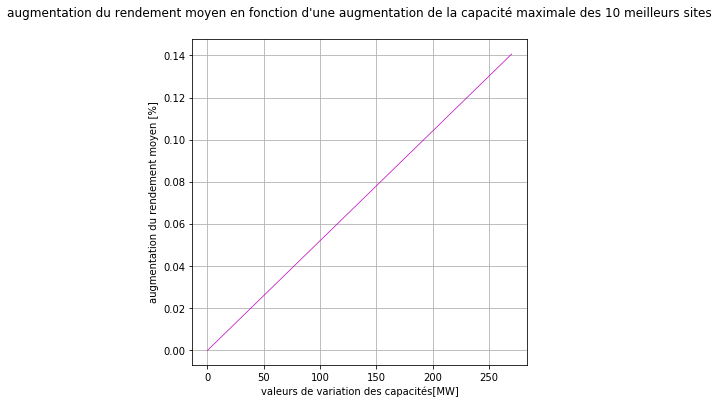

In [34]:
y_10 = []
p = 0
r = 0
for i in dix_m_sites:
    y_10.append(sol_dual_capa[i])
l=[]
t=[]
for delta_b in range(0,300,30):
    l.append((-s.objectiveValue -sum(y_10)*delta_b)/(P*N)*100 - (-s.objectiveValue)/(P*N)*100)
    t.append(delta_b)
    
plt.figure(figsize=(6,6))
plt.plot(t, l, '-m', linewidth=0.7)
plt.xlabel('valeurs de variation des capacités[MW]')
plt.ylabel('augmentation du rendement moyen [%]')
plt.title('augmentation du rendement moyen en fonction d\'une augmentation de la capacité maximale des 10 meilleurs sites', y=1.05)
plt.grid(True)
plt.show()

## *1.4 Résolution avec P variable*

Pour évaluer comment varie la production d'énergie avec le paramètre $P$, puissance totale installée, nous faisons tourner le solveur avec différente valeurs de $\theta P$ avec $\theta$ qui varie entre 0,5 et 2 par pas de 0,1.

[-339.0350745255199, -328.11096902297425, -312.18538743393657, -298.0596412144516, -289.5581887763047, -286.07551469703645, -270.73767821000007, -257.06437256600003, -249.49066951000006, -232.89306349999995, -222.3033729, -209.44396350199995, -192.70159868999997, -183.66043070999999, -157.24128571, -113.92321358]


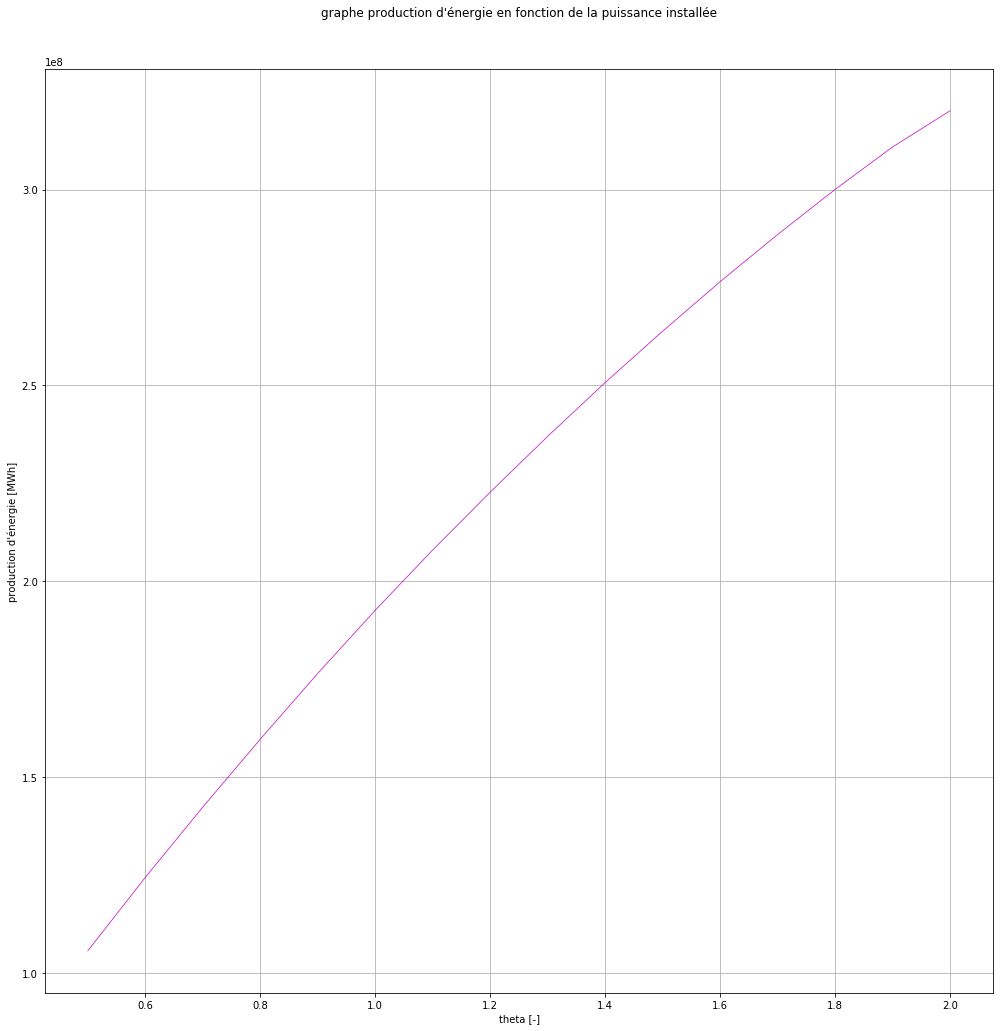

In [36]:
N = 244*3
T = 3
P = 500000
d = 0.02
k = 0.17

thetas = np.arange(0.5, 2.1,0.1)
productions = []
var_duale = []

for theta in thetas:
    s_4 = resolution(N, T, P*theta, d, k, verbose=False)[0]
    productions.append(-s_4.objectiveValue)
    y = s_4.dualConstraintSolution['puissance totale']
    var_duale.append(y[0])


print(var_duale)
plt.figure(figsize=(17,17))
plt.plot(thetas, productions, '-m', linewidth=1)
plt.xlabel('theta [-]')
plt.ylabel('production d\'énergie [MWh]')
plt.title('graphe production d\'énergie en fonction de la puissance installée', y=1.05)
plt.grid(True)
plt.show()

[-339.0350745255199, -328.11096902297425, -312.18538743393657, -298.0596412144516, -289.5581887763047, -286.07551469703645, -270.73767821000007, -257.06437256600003, -249.49066951000006, -232.89306349999995, -222.3033729, -209.44396350199995, -192.70159868999997, -183.66043070999999, -157.24128571, -113.92321358]


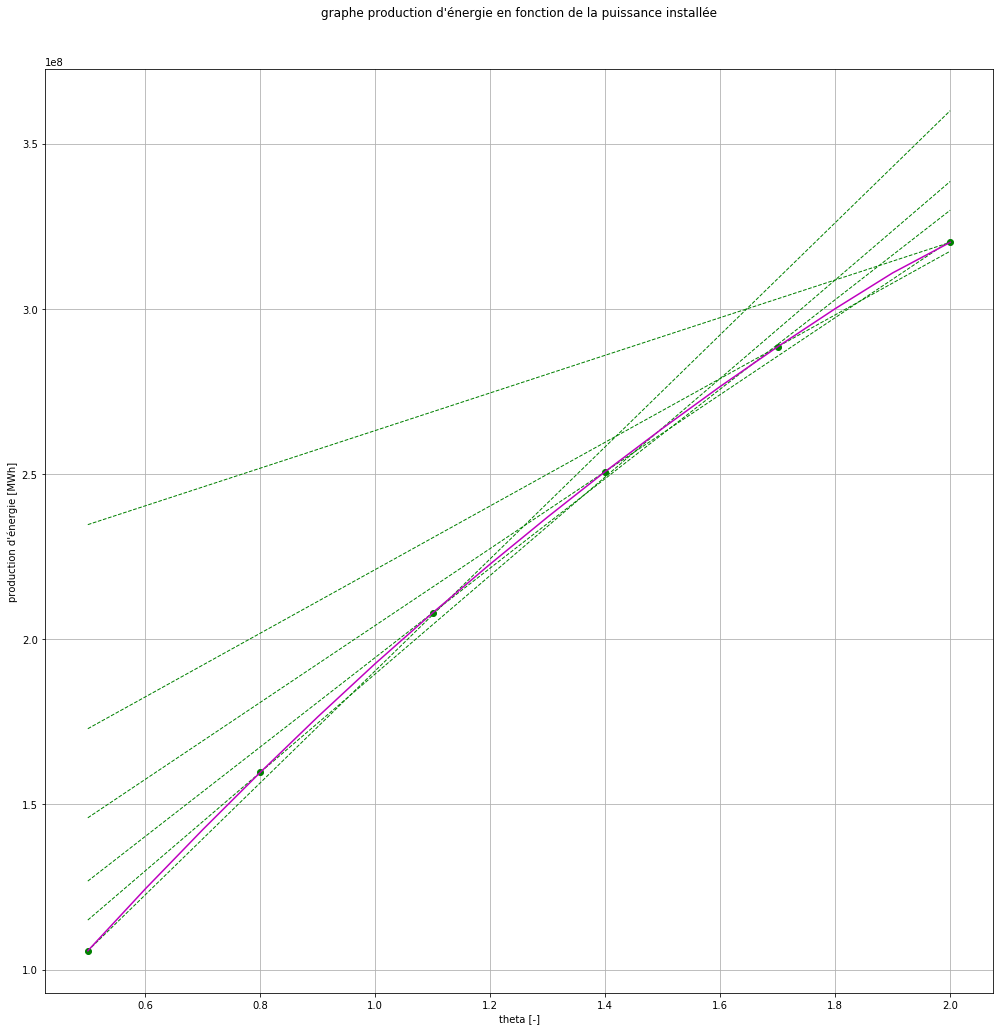

In [79]:
print(var_duale)

tangente_comp = []
tangente_point = []
x_tan_comp = thetas*P

for i in [0,3,6,9,12,15]:
    tangente_comp.append(-var_duale[i] * x_tan_comp + productions[i] + var_duale[i]*x_tan_comp[i])
    tangente_point.append((thetas[i], productions[i]))
x_tan_comp /= P

plt.figure(figsize=(17,17))
for i in range(len(tangente_comp)):
    plt.plot(x_tan_comp, tangente_comp[i], '--g', linewidth=1)
    plt.plot([tangente_point[i][0]], [tangente_point[i][1]], 'og')
plt.plot(thetas, productions, '-m', linewidth=1.5)
plt.xlabel('theta [-]')
plt.ylabel('production d\'énergie [MWh]')
plt.title('graphe production d\'énergie en fonction de la puissance installée', y=1.05)
plt.grid(True)
plt.show()

Si on compare au point 1.3, plus theta augmente, plus la variable duale associée à la contrainte sur la puissance augmente. On a vu au point 1.3 que l'amélioration de la production d'énergie était donnée par -$y_1^*\Delta P$, où $y_1^*$ est la variable duale associée à la contrainte de puissance. Ici, le vecteur var_duale affiché au dessus du graphe nous donne les valeurs de cette variable $y_1$ lorsque theta augmente. On voit bien que les valeurs de $y_1$ sont de moins en moins négatives et que donc l'incrément de puissance apporte une amélioration d'énergie produite de plus en plus faible à mesure que theta augmente. On peut aussi facilement voir ce résultat en observant que la courbe sur notre graphe est concave.

Nous avons aussi représenté sur le graphe en lignes pointillées vertes certaines des droites de pente égale à la variable duale en plusieurs valeurs différentes de $\theta$. On s'attendrait à ce que ces droites soient parfaitement tangentes au graphe de le production d'énergie mais on peut cependant voir que ce n'est pas exactement le cas.

## *1.5 Quelques variantes*

### *1.5.1 Borne supérieur sur P*

Pour le première variante, on va simplement changer la contrainte d'égalité
$$ \sum_{i=1}^{642} x_i = P $$
en une contrainte d'inégalité
$$ \sum_{i=1}^{642} x_i \le P $$

In [109]:
# fonction de résolution pour la variante avec puissance bornée

def resolution_P_bounded(N, T, P, d, k, verbose=True):
    
    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]


    rend = matrix_rendement(rend_off, rend_on, sites) # (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', N//T - 1)


    sum_t = CyLPArray(np.ones((N//T - 1,), dtype = int))
    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x <= P, 'puissance totale')
    model.addConstraint(0 <= x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t <= 0, 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x + t >= 0, 'variabilitee pg') 
    model.addConstraint(sum_t * t <= (d*P*T*(N//T - 1)), 'somme variabilitee')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [127]:
N = 8760
T = 3
P = 500000
d = 0.02
k = 0.17

si, time_taken_51 = resolution_P_bounded(N, T, P, d, k, verbose=False)[:2]

sol_51 = si.primalVariableSolution['x']

In [132]:
print("Puissance totale installée: {:.2f}".format(np.sum(sol_51)))
print("Temps de résolution de la variante: {:.0f} min {:.3f} sec".format(time_taken_51//60, time_taken_51 % 60))
print("Temps de résolution de l'original: {:.0f} min {:.3f} sec".format(time_taken//60, time_taken % 60))

for i in range(642):
    if abs(sol[i] - sol_51[i] >= 10e-4):
        print("différence:", sol[i], sol_51[i])

Puissance totale installée: 500000.00
Temps de résolution de la variante: 1 min 54.196 sec
Temps de résolution de l'original: 12 min 35.347 sec


On peut constater que changer la contrainte de puissance totale installée d'une égalité à une inégalité ne change pas le résultat puisque la somme de toutes les puissances installées sur chaque site vaut toujours $P = 500000$ MW. le vecteur $x$ solution reste le même aussi. Ce qui est intéressant de noter par contre est que le temps de résolution de cette variante est beaucoup plus petit que celui de l'original.

### *1.5.2 Variabilitée maximale*

Pour imposer la variabilitée maximale, on impose simplement que chaque différence d'énergie produite par période soit inférieur en valeur absolue à $\delta P T$ où $T$ est le nombre d'heures par période.
$$ |MRx| \le \delta P T$$
Cette inégalité est à considérer composante par composante car le membre de gauche est un vecteur de taille $\frac{8760}{T}-1$ tandis que le membre de droite est un scalaire. La matrice $R$ est la matrice des rendements et la matrice $M$ est la matrice qui combine les énergies $Rx$ en somme de $T$ heures et les soustrait par périodes consécutives. Par exemple, pour $T=3$ on a

$$ M = \begin{pmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots \\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & \cdots \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & \cdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} $$ de taille $[\frac{8760}{T} \times 8760]$

In [47]:
# fonction de résolution avec variabilitée maximale

def resolution_var_max(N, T, P, d, k, verbose=True):
    
    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]


    rend = matrix_rendement(rend_off, rend_on, sites) # (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # (N/T-1, N/T) @ (N/T , N)

    
    model = CyLPModel()
    x = model.addVariable('x', nb_site)


    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))


    model.addConstraint(sum_x * x == P, 'puissance totale')
    model.addConstraint(0 <= x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x <= (d*P*T), 'variabilitee pp')
    model.addConstraint((variabilitee @ rend.T) * x >= -(d*P*T), 'variabilitee pg')


    c = sum_rendement(rend, nb_site)
    model.objective = -c * x 


    s = CyClpSimplex(model)


    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [51]:
N = 8760
T = 3
P = 500000
d = 0.02
k = 0.17

result = resolution_var_max(N, T, P, d, k)

résolution: primal infeasible


On obtient un problème impossible à résoudre en considérant toutes les heures et avec $\delta = 0.02$. Aucune solution ne peut satisfaire toutes les contraintes car la contrainte de variabilitée maximale est trop dur à satisfaire, ce qu'on peut faire alors c'est augmenter cette borne maximale en augmentant $\delta$. On a alors trouver une solution possuble pour $\delta = 0,05$.

In [52]:
N = 8760
T = 3
P = 500000
d = 0.05
k = 0.17

s_52, time_taken_52, rend = resolution_var_max(N, T, P, d, k)

sol_52 = s_52.primalVariableSolution['x']

résolution: optimal


In [61]:
t_52 = abs(np.array(var_matrix(N//T) @ matrix_sum_periods(N, T) @ rend.T) @ sol_52)


print("Variabilitée max: {:.2f} MWh ({})".format(t_52.max(), "OK" if abs(t_52.max() - d*P*T) <= 1e-3 else "NOT OK"))

print("Production d'energie totale: {:.0f} GWh".format(-s_52.objectiveValue/1000))

print("Rendement moyen: {:.2f}%".format(-s_52.objectiveValue/(P*N)*100))

Variabilitée max: 75000.00 MWh (OK)
Production d'energie totale: 1763726 GWh
Rendement moyen: 40.27%


On voit cependant que le rendement global reste plus faible que celui du problème initial.

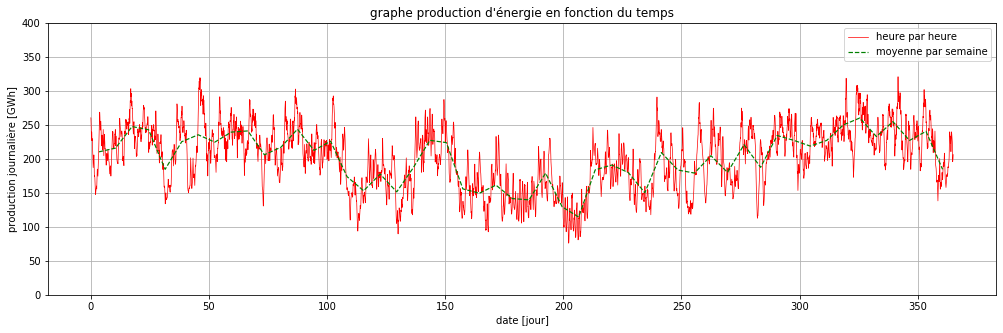

In [40]:
# plot energie avec variabilitée max en fonction du temps

energie = np.array(rend.T).dot(sol_52)/1000
x_graph = np.arange(1,N+1,1)/24

avrg_week_x = np.arange(24*7,24*7*53,24*7)/24 - 3.5
avrg_week = np.array(matrix_sum_periods(24*7*52, 24*7)).dot(energie[:24*7*52])/(24*7)

plt.figure(figsize=(17,5))
plt.plot(x_graph, energie, '-r', linewidth=0.7)
plt.plot(avrg_week_x, avrg_week, '--g', linewidth=1.2)
plt.xlabel('date [jour]')
plt.ylabel('production journalière [GWh]')
plt.title('graphe production d\'énergie en fonction du temps')
plt.grid()
plt.legend(['heure par heure','moyenne par semaine'])
plt.ylim(0,400)
plt.show()

### *1.5.3 Problème avec écrêtement*

Pour ce point nous allons considérer un facteur d'écrêtement $\theta_k$ comme étant une production d'énergie soutirée par période de $T$ heures. C'est à dire qu'on va accepter un modèle où il est possible pour chaque site éolien de produire moins d'énergie que celle prédite par le rendement et si nécessaire de manière différente période par période. Commençons donc par modéliser le problème.
<br> <br>
Il est clair qu'il est impossible d'ajouter une nouvelle contrainte pour chaque rendement/site/période, car cela reviendrait à ajouter $642\frac{N}{T}$ nouvelles variables et pour $N$ grand cela prendrait beaucoup trop de temps à résoudre. Nous allons donc plutôt diminuer la production d'énergie totale par période sans prêter attention à la répartition de cette diminution entre les 642 sites. Nous allons donc modifier la fonction objectif ainsi que la contrainte de variabilitée puisque ces quantités sont affectées par le changement de production d'énergie. On peut remodéliser le problème ainsi :

**Fonction objectif :**

* maximum $\sum_{i=1}^{642}\sum_{j=1}^{8760} x_i r_{ji}$ - $\sum_{k=1}^{8760/T} \theta_k$

**Contraintes:**

* $\sum_{i=1}^{642} x_i = P$

* $0 \leq x_i \leq c_{i}$  pour tout $i \in \{1,\dots,642\}$.

* $\sum_{i=1}^{642} a_i x_i = \kappa P$

* $ -t \leq MRx - F \theta \leq t$

avec $F = \begin{pmatrix}
1 & -1 & 0 & 0 & \cdots & 0 & 0 & 0\\
0 & 1 & -1 &  0 & \cdots & 0 & 0 & 0\\
0 & 0 & 1 & -1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots  &\vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 1 & -1 & 0\\
0 & 0 & 0 & 0 & \cdots & 0 & 1 & -1\\
\end{pmatrix}$ de taille $[(\frac{8760}{T}-1) \times \frac{8760}{T}]$

* $\sum_{i=1}^{8760/T - 1} t_i \leq T \delta P (\frac{8760}{T} - 1)$

* $0 \leq \theta_k \leq \sum_{i=kT+1}^{(k+1)T} (Rx)_i $ avec $k \in \{ 0 \dots \frac{8760}{T}-1 \} $

Cette nouvelle contrainte fixe des limites sur l'ecrêtement. Ce dernier sera positif (ou égal à 0) et plus petit ou égal à l'énergie totale produite sur chaque période pour éviter d'avoir une production d'énergie négative.

In [6]:
def ecretement(N, T, P, d, k, verbose=True):

    rend_off = rend_off_entire[:,:N]
    rend_on = rend_on_entire[:,:N]
    I = np.matrix(np.eye(nb_site)) # shape: (642, 642)
    

    rend = matrix_rendement(rend_off, rend_on, sites) # shape: (642, N)


    variabilitee = var_matrix(N//T) @ matrix_sum_periods(N, T) # shape: (N/T-1, N/T) @ (N/T , N)


    model = CyLPModel()
    x = model.addVariable('x', nb_site)
    t = model.addVariable('t', N//T - 1)
    Theta = model.addVariable('Theta', N//T)


    sum_t = CyLPArray(np.ones((N//T - 1,), dtype = int))
    sum_x = CyLPArray(np.ones((nb_site,), dtype=int))
    sum_theta = CyLPArray(np.ones((N//T), dtype=int)) # shape : (N/T, )
    
    
    sansDernier = np.matrix(np.eye(N//T)[:-1]) # shape : (N/T -1, N/T)
    sansPremier = np.matrix(np.eye(N//T)[1:]) # shape : (N/T -1, N/T)

    model.addConstraint(sum_x * x == P, 'puissance totale')
    model.addConstraint(0 <= I*x <= capacites, 'capacitee')
    model.addConstraint(off_cap * x == (k*P), 'puissance offshore')
    model.addConstraint((variabilitee @ rend.T) * x - t - sansDernier*Theta + sansPremier*Theta <= 0 , 'variabilitee pp modif')
    model.addConstraint((variabilitee @ rend.T) * x + t - sansDernier*Theta + sansPremier*Theta >= 0, 'variabilitee pg modif') 
    model.addConstraint(sum_t * t <= (d*P*T*(N//T - 1)), 'somme variabilitee')
    model.addConstraint(Theta >= 0, 'terme d\'écrêtement')
    model.addConstraint((matrix_sum_periods(N, T) @ rend.T) * x - Theta >= 0, 'limite sur l\'écrêtement')
    

    c = sum_rendement(rend, nb_site)
    model.objective = -c * x + sum_theta * Theta


    s = CyClpSimplex(model)
    
    
    start = time.time()
    result = s.dual()
    end = time.time()
    
    if verbose:
        print("résolution:", result)
    
    return s, (end-start), rend

In [7]:
N = 8760
T = 3
P = 500000
d = 0.02
k = 0.17

s_53, time_taken_53 = ecretement(N, T, P, d, k)[:2]

sol_53 = s_53.primalVariableSolution['x']
sol_t_53 = s_53.primalVariableSolution['t']
sol_th_53 = s_53.primalVariableSolution['Theta']

résolution: optimal


In [8]:
print("N = {}\nP = {}\nT = {}\nd = {}\nk = {}\n".format(N, P, T, d, k))

print("Variabilitée moyenne: {:.2f} MWh ({})".format(sol_t_53.sum()/(N//T - 1), "OK" if abs(sol_t_53.sum()/(N//T - 1) - d*P*T) <= 1e-3 else "NOT OK"))

print("Puissance installée totale: {:.0f} MW ({})".format(np.sum(sol_53), "OK" if abs(np.sum(sol_53) - P) < 1e-3 else "NOT OK"))

print("Puissance installée offshore: {:.0f} MW ({})".format(np.dot(np.array(off_cap), sol_53), "OK" if abs(np.dot(np.array(off_cap), sol_53) - k*P) < 1e-3 else "NOT OK"))

print("Production d'energie totale: {:.2f} GWh".format(-s_53.objectiveValue/1000))

print("Rendement moyen: {:.2f}%".format(-s_53.objectiveValue/(P*N)*100))

print("Temps de résolution: {:.0f} min {:.3f} sec".format(time_taken_53//60, time_taken_53 % 60))

N = 8760
P = 500000
T = 3
d = 0.02
k = 0.17

Variabilitée moyenne: 30000.00 MWh (OK)
Puissance installée totale: 500000 MW (OK)
Puissance installée offshore: 85000 MW (OK)
Production d'energie totale: 1971233.47 GWh
Rendement moyen: 45.01%
Temps de résolution: 18 min 30.806 sec


On remarque que le rendement moyen ainsi que la production d'énergie totale sont plus élevés que pour le problème de base. Le modèle avec écrêtement est donc un modèle plus optimale et sa résolution l'est aussi (à noter qu'avec notre implémentation le temps de résolution est cependant plus grand).

In [9]:
# DEBUGGING: ne pas mettre ca dans le rapport!


liste_i = []
count = 0

for i in range(len(sol_th_53)):
    if sol_th_53[i] != 0:
        print(sol_th_53[i], i)
        liste_i.append(i)
        count += 1

print(count)
print(sol_th_53.max())

29404.71979304061 17
23242.45097139456 20
103085.71475288697 21
22544.11876804581 33
31661.47884410797 42
10264.23034482057 52
21588.254583387523 58
18142.96991295718 66
29739.66595004745 91
15426.751773740509 96
97777.6872092038 113
11270.856824681274 118
36609.50811338052 149
29026.185423886036 164
17956.670646452127 167
37668.006711569724 177
31674.803418335294 178
28241.604013210504 187
26509.411305792564 198
25105.27010617919 201
34678.081757504304 205
14087.402782183957 210
28880.953137458568 226
54053.929484990695 235
36617.49388521363 236
42997.59966927732 307
35948.3403793398 311
22794.269944168558 335
45787.59466661623 338
32880.51765600027 359
9439.086294704224 362
46465.502230760874 373
29060.736240092992 393
41410.81657044445 398
43952.66441608143 399
35888.36504647706 405
29212.678130715394 408
44174.973811052754 425
26585.173150652023 447
31284.956688982365 462
54276.969071494736 464
9540.69514053602 480
24206.163414414757 484
83628.38279335514 499
71031.24480359403 505


156527.18991355275


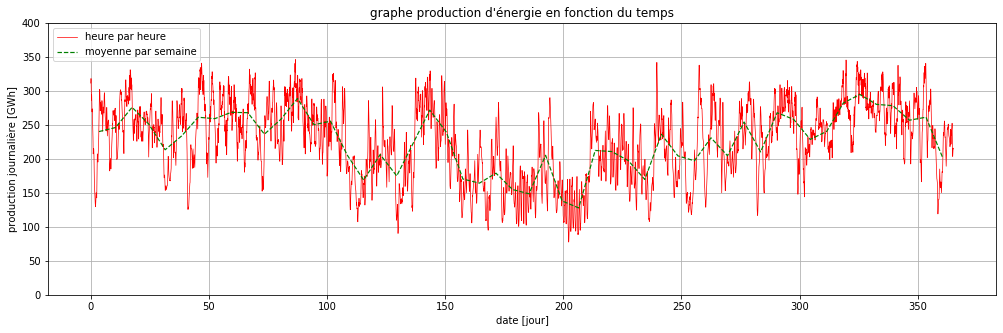

In [10]:
print(sol_th_53.max())

rend_off = rend_off_entire[:,:N]
rend_on = rend_on_entire[:,:N]
    
rend = matrix_rendement(rend_off, rend_on, sites)

# plot energie avec variabilitée max en fonction du temps

energie = np.array(rend.T).dot(sol_53)/1000
x_graph = np.arange(1,N+1,1)/24

avrg_week_x = np.arange(24*7,24*7*53,24*7)/24 - 3.5
avrg_week = np.array(matrix_sum_periods(24*7*52, 24*7)).dot(energie[:24*7*52])/(24*7)

plt.figure(figsize=(17,5))
plt.plot(x_graph, energie, '-r', linewidth=0.7)
plt.plot(avrg_week_x, avrg_week, '--g', linewidth=1.2)
plt.xlabel('date [jour]')
plt.ylabel('production journalière [GWh]')
plt.title('graphe production d\'énergie en fonction du temps')
plt.grid()
plt.legend(['heure par heure','moyenne par semaine'])
plt.ylim(0,400)
plt.show()